In [30]:
#Датасет содержит данные о среднем ежедневном времени, которое дети проводят перед экраном.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#загрузка данных
path = 'screen_time.csv'
data = pd.read_csv (path)

#проверка на пропущенные значения
print ('Пропущенные значения до обработки:')
print (data.isnull().sum())

#заполнение пропущенных значений (числовые заполняем средним значением, категориальные - модой)
for col in data:
  data[col] = data[col].fillna(data[col].mean() if data[col].dtype in ['int64', 'float64'] else data[col].mode()[0])

#кодируем категориальные признаки
label_encoders = {}
categorical_cols = ['Gender', 'Screen Time Type', 'Day Type']
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

#разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('Average Screen Time (hours)', axis=1)
y = data['Average Screen Time (hours)'].astype(int)

#разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=42)

#инициализируем модели
models = {
    'GradientBoosting' : GradientBoostingRegressor(n_estimators=100, random_state=42),
    'ExtraTrees' : ExtraTreesRegressor (n_estimators=100, random_state=42),
    'RandomForest' : RandomForestRegressor (n_estimators=100, random_state=42),
    'BayesianRidge' : BayesianRidge(),
    'KNeighbors' : KNeighborsRegressor(n_neighbors=5),
    'ElasticNet' : ElasticNet(random_state=42,alpha=0.5, max_iter=1000,l1_ratio=0.5)
}

results = []
#обучение и предсказание
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

#расчет метрик
  results.append ({
    'Модель' : name,
    'MSE' : round(mean_squared_error(y_test,y_pred),2),
    'MAE' : round(mean_absolute_error(y_test, y_pred),2),
    'R2' : round(r2_score(y_test, y_pred),2)
   })

#создание DataFrame с результатами
results_df = pd.DataFrame(results)
print ('\nСравнение моделей:')
print (results_df.to_markdown(index=False))

print("\nВыводы:")
print(f"Лучшая модель по точности (R2 {results_df.loc [results_df['R2'].idxmax()]['R2']}): {best_r2['Модель']}")



Пропущенные значения до обработки:
Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

Сравнение моделей:
| Модель           |   MSE |   MAE |   R2 |
|:-----------------|------:|------:|-----:|
| GradientBoosting |  0.22 |  0.39 | 0.95 |
| ExtraTrees       |  0.31 |  0.34 | 0.93 |
| RandomForest     |  0.26 |  0.35 | 0.94 |
| BayesianRidge    |  0.57 |  0.62 | 0.88 |
| KNeighbors       |  1.58 |  1.01 | 0.67 |
| ElasticNet       |  1.22 |  0.84 | 0.74 |

Выводы:
Лучшая модель по точности (R2 0.95): GradientBoosting


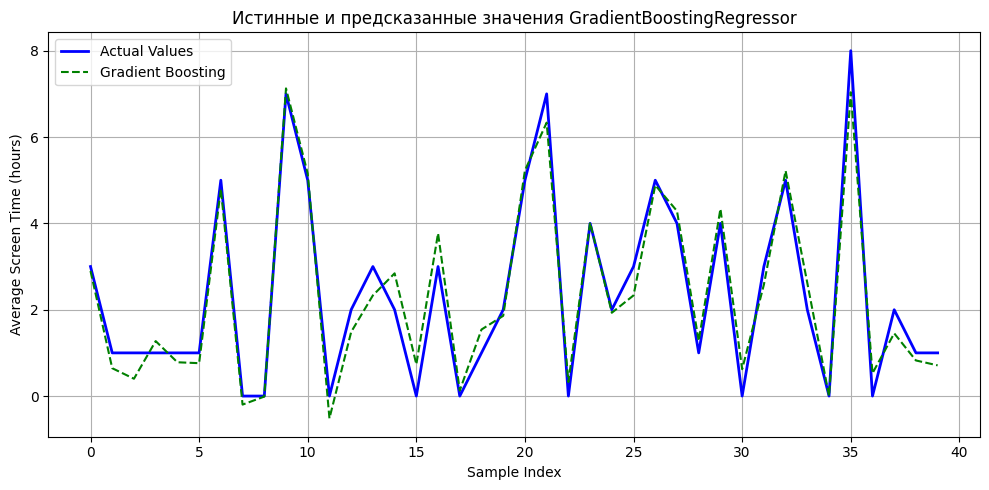

In [45]:
#визуализация Gradient Boosting
model = models['GradientBoosting']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='Gradient Boosting', linewidth=1.5)
plt.title('Истинные и предсказанные значения GradientBoostingRegressor')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

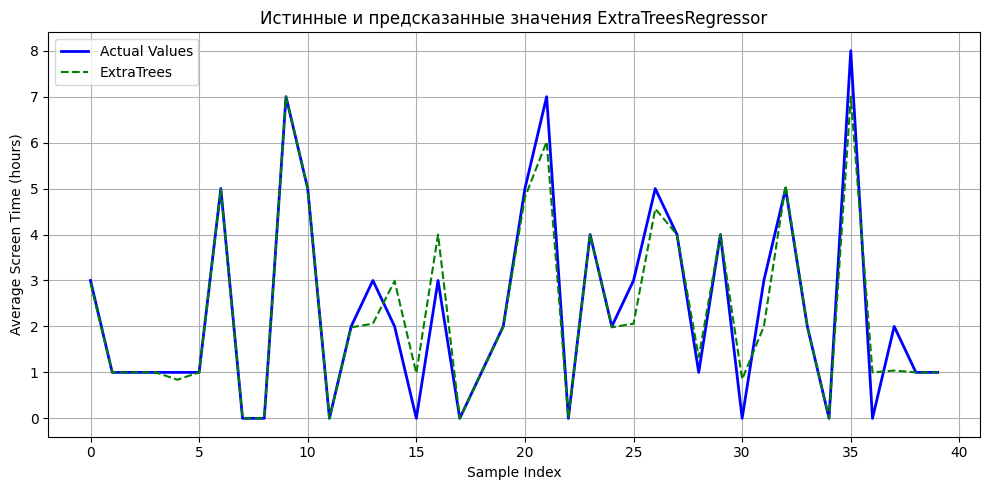

In [48]:
#визуализация ExtraTrees
model = models['ExtraTrees']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='ExtraTrees', linewidth=1.5)
plt.title('Истинные и предсказанные значения ExtraTreesRegressor')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

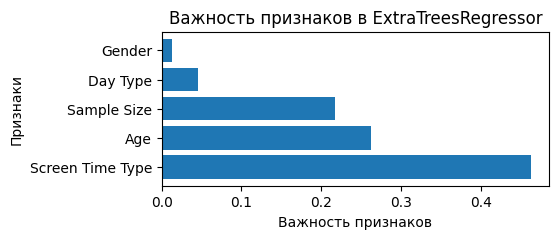

In [36]:
#вывод важности признаков
plt.figure(figsize=(5, 2))
feature_importance = models['ExtraTrees'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в ExtraTreesRegressor')
plt.show()

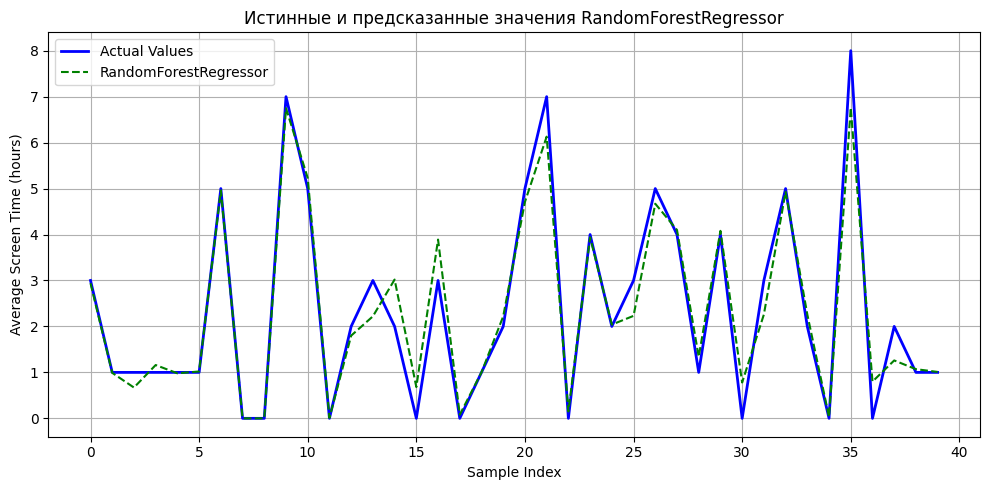

In [47]:
#визуализация RandomForestRegressor
model = models['RandomForest']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='RandomForestRegressor', linewidth=1.5)
plt.title('Истинные и предсказанные значения RandomForestRegressor')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

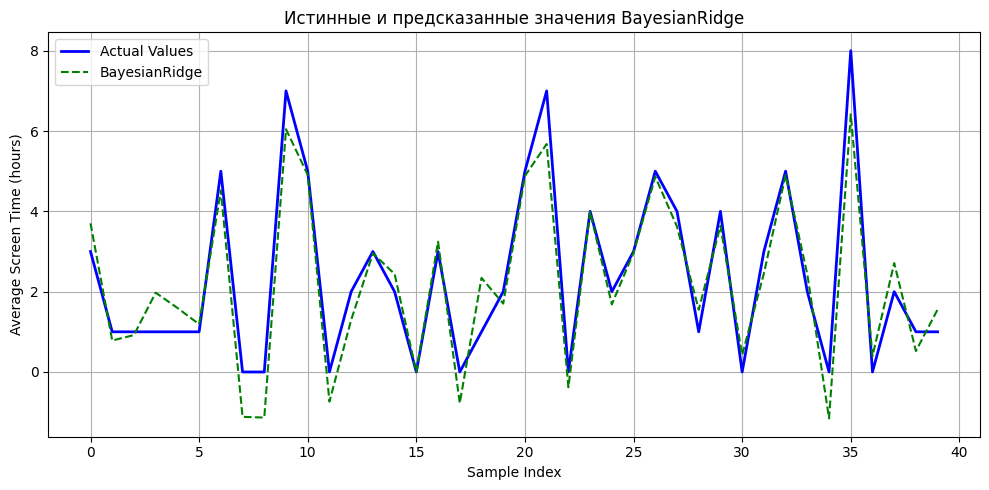

In [49]:
#визуализация BayesianRidge
model = models['BayesianRidge']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='BayesianRidge', linewidth=1.5)
plt.title('Истинные и предсказанные значения BayesianRidge')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

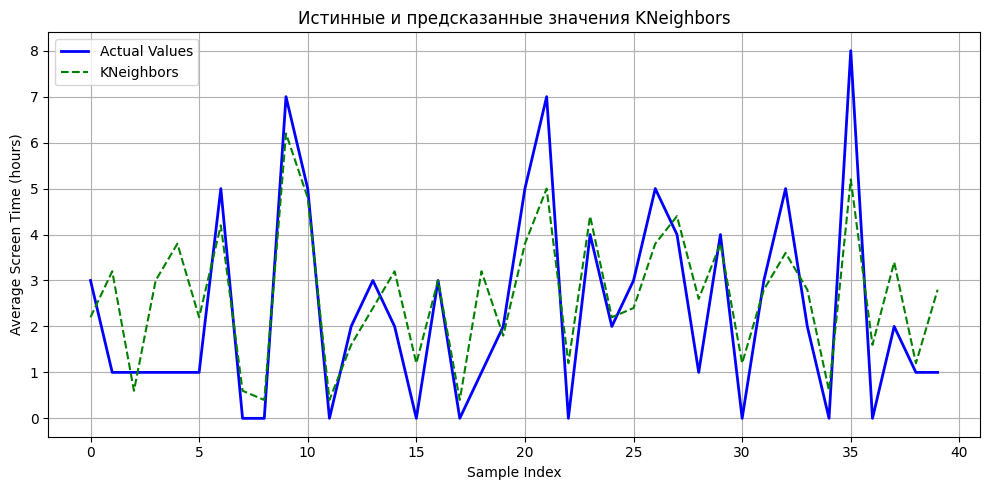

In [50]:
#визуализация KNeighborsRegressor
model = models['KNeighbors']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='KNeighbors', linewidth=1.5)
plt.title('Истинные и предсказанные значения KNeighbors')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

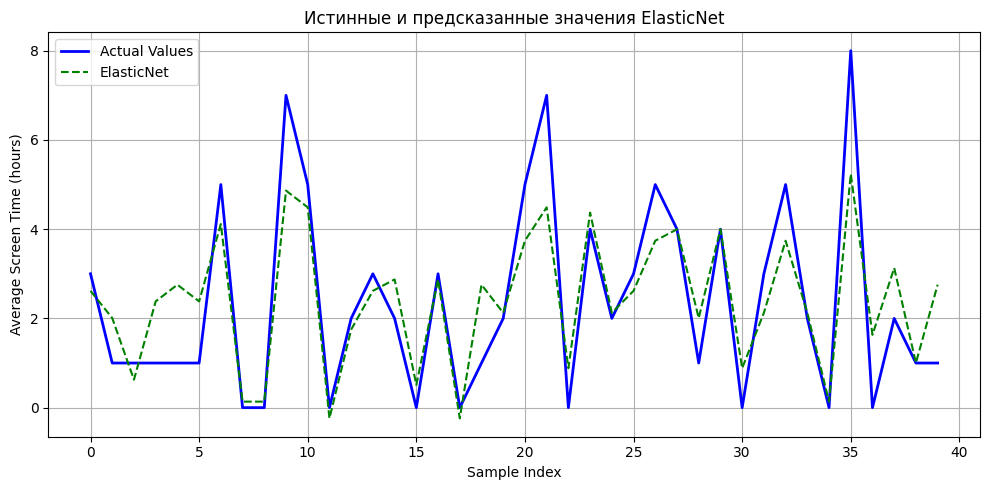

In [51]:
#визуализация ElasticNet
model = models['ElasticNet']
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred[:n_show], 'g--', label='ElasticNet', linewidth=1.5)
plt.title('Истинные и предсказанные значения ElasticNet')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()